<a href="https://colab.research.google.com/github/martamehr/dash-tutorial/blob/main/01-3-passwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study: Passwords

## Import data

In [1]:
import pandas as pd

ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "passwords.csv"

df = pd.read_csv(ROOT + DATA)

## Data inspection

In [2]:
# First ten rows of the passwords dataset.
df.head(10)

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1,password,password-related,6.91,years,2.170000e+00,1,8,11
1,2,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2,4,8
2,3,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3,4,8
3,4,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4,4,8
4,5,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5,8,11
5,6,12345,simple-alphanumeric,1.85,minutes,1.110000e-06,6,4,8
6,7,dragon,animal,3.72,days,3.210000e-03,7,8,11
7,8,baseball,sport,6.91,years,2.170000e+00,8,4,8
8,9,football,sport,6.91,years,2.170000e+00,9,7,11
9,10,letmein,password-related,3.19,months,8.350000e-02,10,8,11


In [3]:
# Bottom ten rows of the passwords dataset.
df.tail(10)

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
490,491,natasha,name,3.19,months,0.08350,493,7,11
491,492,sniper,cool-macho,3.72,days,0.00321,494,8,11
492,493,chance,name,3.72,days,0.00321,495,7,11
493,494,genesis,nerdy-pop,3.19,months,0.08350,496,7,11
494,495,hotrod,cool-macho,3.72,days,0.00321,497,7,11
495,496,reddog,cool-macho,3.72,days,0.00321,498,6,10
496,497,alexande,name,6.91,years,2.17000,499,9,12
497,498,college,nerdy-pop,3.19,months,0.08350,500,7,11
498,499,jester,name,3.72,days,0.00321,501,7,11
499,500,passw0rd,password-related,92.27,years,29.02000,502,28,21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               500 non-null    int64  
 1   password           500 non-null    object 
 2   category           500 non-null    object 
 3   value              500 non-null    float64
 4   time_unit          500 non-null    object 
 5   offline_crack_sec  500 non-null    float64
 6   rank_alt           500 non-null    int64  
 7   strength           500 non-null    int64  
 8   font_size          500 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 35.3+ KB


## Data transformation

In [5]:
df["category"] = df["category"].astype("category")
df["time_unit"] = df["time_unit"].astype("category")
df["strenght"] = df["strength"].astype("category")

In [ ]:
df.dtypes

rank                    int64
password               object
category             category
value                 float64
time_unit            category
offline_crack_sec     float64
rank_alt                int64
strength                int64
font_size               int64
strenght             category
dtype: object

## Data exploration

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", color_codes=True)

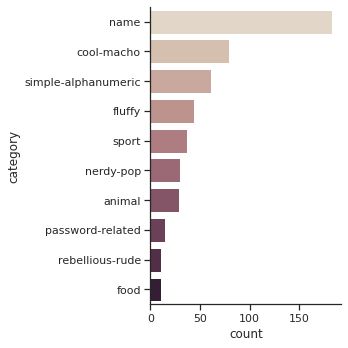

In [7]:
TOP_10 = df['category'].value_counts().iloc[:10].index

sns.catplot(y="category", 
            kind="count", 
            palette="ch:.25", 
            data=df,
            order = TOP_10)

plt.show();


- Next, we want to use ``catplot`` for all categorical variables. 
- We use a for loop to obtain the desired result.

- First, let's extract all categorical variabel names as list:

In [8]:
CATEGORICAL = df.select_dtypes(include=['category']).columns.tolist()
CATEGORICAL

['category', 'time_unit', 'strenght']

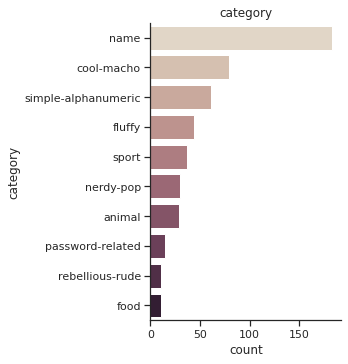

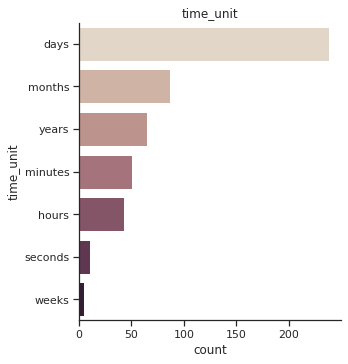

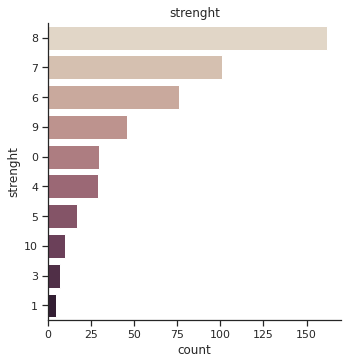

In [9]:
for i in CATEGORICAL:

    TOP_10 = df[i].value_counts().iloc[:10].index

    g = sns.catplot(y=i, 
            kind="count", 
            palette="ch:.25", 
            data=df,
            order = TOP_10)    
    
    plt.title(i)
    plt.show();

## Summary of numerical variables

In [10]:
df.describe()

,rank,value,offline_crack_sec,rank_alt,strength,font_size
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000
mean,250.500000,5.602660,5.000096e-01,251.224000,7.432000,10.298000
std,144.481833,8.436005,2.658132e+00,145.052163,5.415536,3.651282
min,1.000000,1.290000,1.110000e-07,1.000000,0.000000,0.000000
25%,125.750000,3.430000,3.210000e-03,125.750000,6.000000,10.000000
50%,250.500000,3.720000,3.210000e-03,251.500000,7.000000,11.000000
75%,375.250000,3.720000,8.350000e-02,376.250000,8.000000,11.000000
max,500.000000,92.270000,2.927000e+01,502.000000,48.000000,28.000000
